# IMPORTING THE MODEL TO BE USED

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Activation

# evaluation metrics for the models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
import datetime

# warning compression
import warnings
warnings.filterwarnings('ignore')

In [53]:
# read the brent dataset
df = pd.read_csv('brent.csv')

In [54]:
# displaying the top five records
df.head()

Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63

In [55]:
# print the total records in the data and the number of fetaures
df.shape
print(f'The dataset for brent oil has {df.shape[0]} with {df.shape[1]} features')

The dataset for brent oil has 9011 with 2 features


In [56]:
#  getting statistical information about the dataset
df.describe()

Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000

In [57]:
# gettting information about the dataset including the data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [58]:
# checking for empty field in the dataset
df.isna().sum()

Date     0
Price    0
dtype: int64

## data preprocessing and exploration

In [59]:
indexNames = df[df['Price'] < 0].index
df.drop(indexNames , inplace=True)
df.shape

(9011, 2)

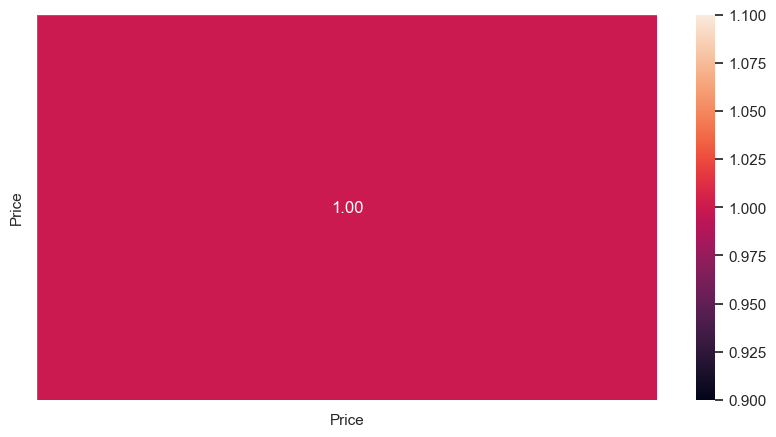

In [61]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(),
            annot = True,
            linecolor = 'r',
            linewidths = .5,
            fmt = '.2f',
            ax = ax);
plt.show()

Text(0.5, 1.0, 'Brent Oil Trend Lines')

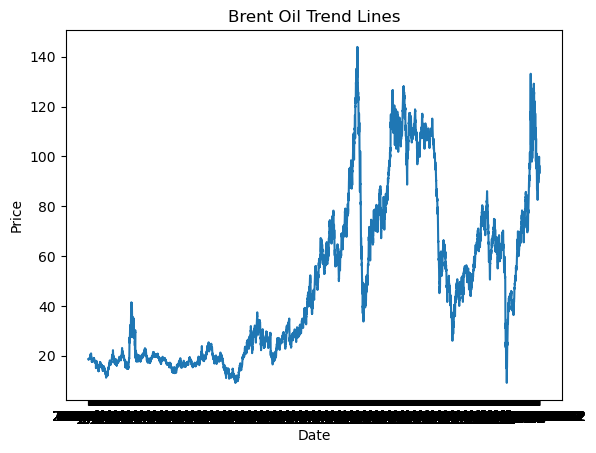

In [9]:
g = sns.lineplot(x='Date',y='Price', data = df)
plt.title("Brent Oil Trend Lines")

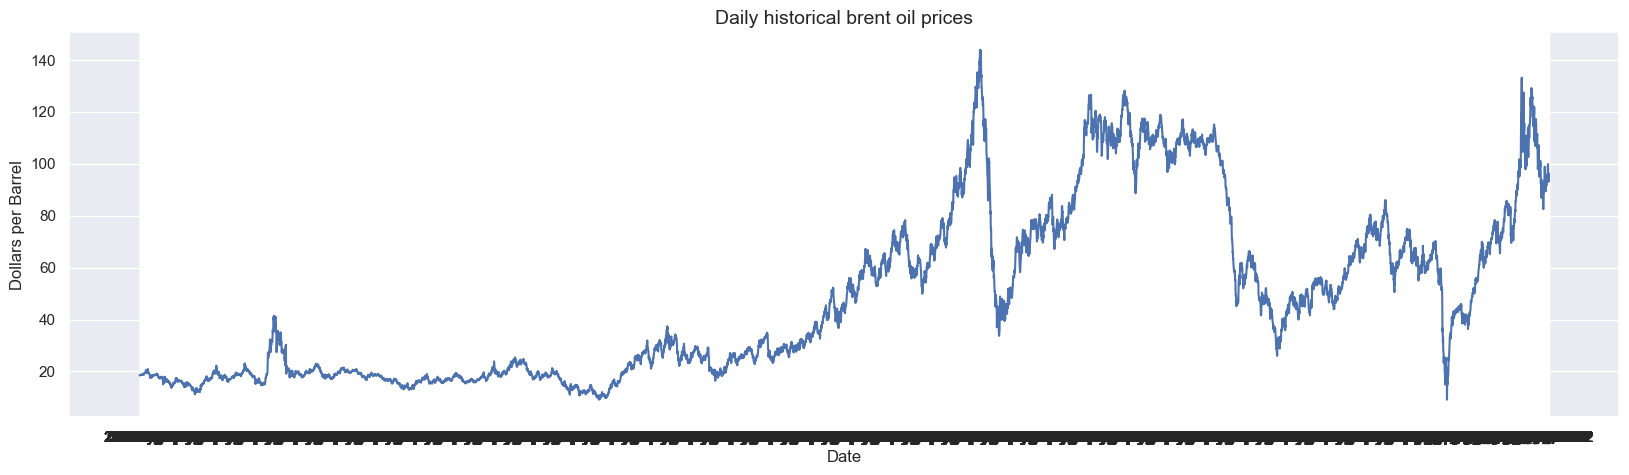

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 5))
sns.lineplot(x="Date", y="Price", data=df)
plt.title('Daily historical brent oil prices', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.show()

In [11]:
# make dates the index
df.set_index(pd.DatetimeIndex(df.Date), inplace=True)
# fill date gaps
df = df.resample('D').pad()
#fix the Date column
df.Date = df.index.values
df.shape

(12963, 2)

In [12]:
ms_scaler= MinMaxScaler(feature_range=(0, 1))
dataset = ms_scaler.fit_transform(df.Price.values.reshape(-1, 1))

In [13]:
# split into train and test sets
percent_split = 0.7
train_size = int(len(dataset) * percent_split)
test_size = int(len(dataset) * (1 - percent_split))
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(f'Dataset size: {len(df)}|| Training Data Length: {len(train)} || Test Data Length: {len(test)}')

Dataset size: 12963|| Training Data Length: 9074 || Test Data Length: 3889


In [62]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, loop_back=15):
    df_X, df_Y = [], []
    for i in range(len(dataset)-loop_back-1):
        a = dataset[i:(i+loop_back), 0]
        df_X.append(a)
        df_Y.append(dataset[i + loop_back, 0])
    return np.array(df_X), np.array(df_Y)

In [63]:
x_train, y_train = create_dataset(train, loop_back=15)
x_test, y_test = create_dataset(test, loop_back=15)

In [16]:
X_train = x_train
X_test = x_test

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

## ANN Architecture 

In [18]:
# create and fit the ANN network
loop_dim = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, loop_dim)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
9058/9058 - 25s - loss: 6.1740e-04 - 25s/epoch - 3ms/step
Epoch 2/50
9058/9058 - 21s - loss: 1.8101e-04 - 21s/epoch - 2ms/step
Epoch 3/50
9058/9058 - 28s - loss: 1.4584e-04 - 28s/epoch - 3ms/step
Epoch 4/50
9058/9058 - 28s - loss: 1.3750e-04 - 28s/epoch - 3ms/step
Epoch 5/50
9058/9058 - 28s - loss: 1.2698e-04 - 28s/epoch - 3ms/step
Epoch 6/50
9058/9058 - 25s - loss: 1.1507e-04 - 25s/epoch - 3ms/step
Epoch 7/50
9058/9058 - 25s - loss: 1.0213e-04 - 25s/epoch - 3ms/step
Epoch 8/50
9058/9058 - 24s - loss: 1.0194e-04 - 24s/epoch - 3ms/step
Epoch 9/50
9058/9058 - 26s - loss: 1.0175e-04 - 26s/epoch - 3ms/step
Epoch 10/50
9058/9058 - 26s - loss: 9.3965e-05 - 26s/epoch - 3ms/step
Epoch 11/50
9058/9058 - 24s - loss: 9.2998e-05 - 24s/epoch - 3ms/step
Epoch 12/50
9058/9058 - 24s - loss: 8.8538e-05 - 24s/epoch - 3ms/step
Epoch 13/50
9058/9058 - 22s - loss: 8.8874e-05 - 22s/epoch - 2ms/step
Epoch 14/50
9058/9058 - 21s - loss: 8.5336e-05 - 21s/epoch - 2ms/step
Epoch 15/50
9058/9058 - 26s -

In [19]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = ms_scaler.inverse_transform(train_predict)
trainY = ms_scaler.inverse_transform([y_train])
test_predict = ms_scaler.inverse_transform(test_predict)
testY = ms_scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

122/122 [==============================] - 0s 2ms/step
Train Score: 0.88 RMSE
Test Score: 1.36 RMSE


In [20]:
print('R2 Score: ', r2_score(testY[0], test_predict[:,0]))

R2 Score:  0.9973063754079979


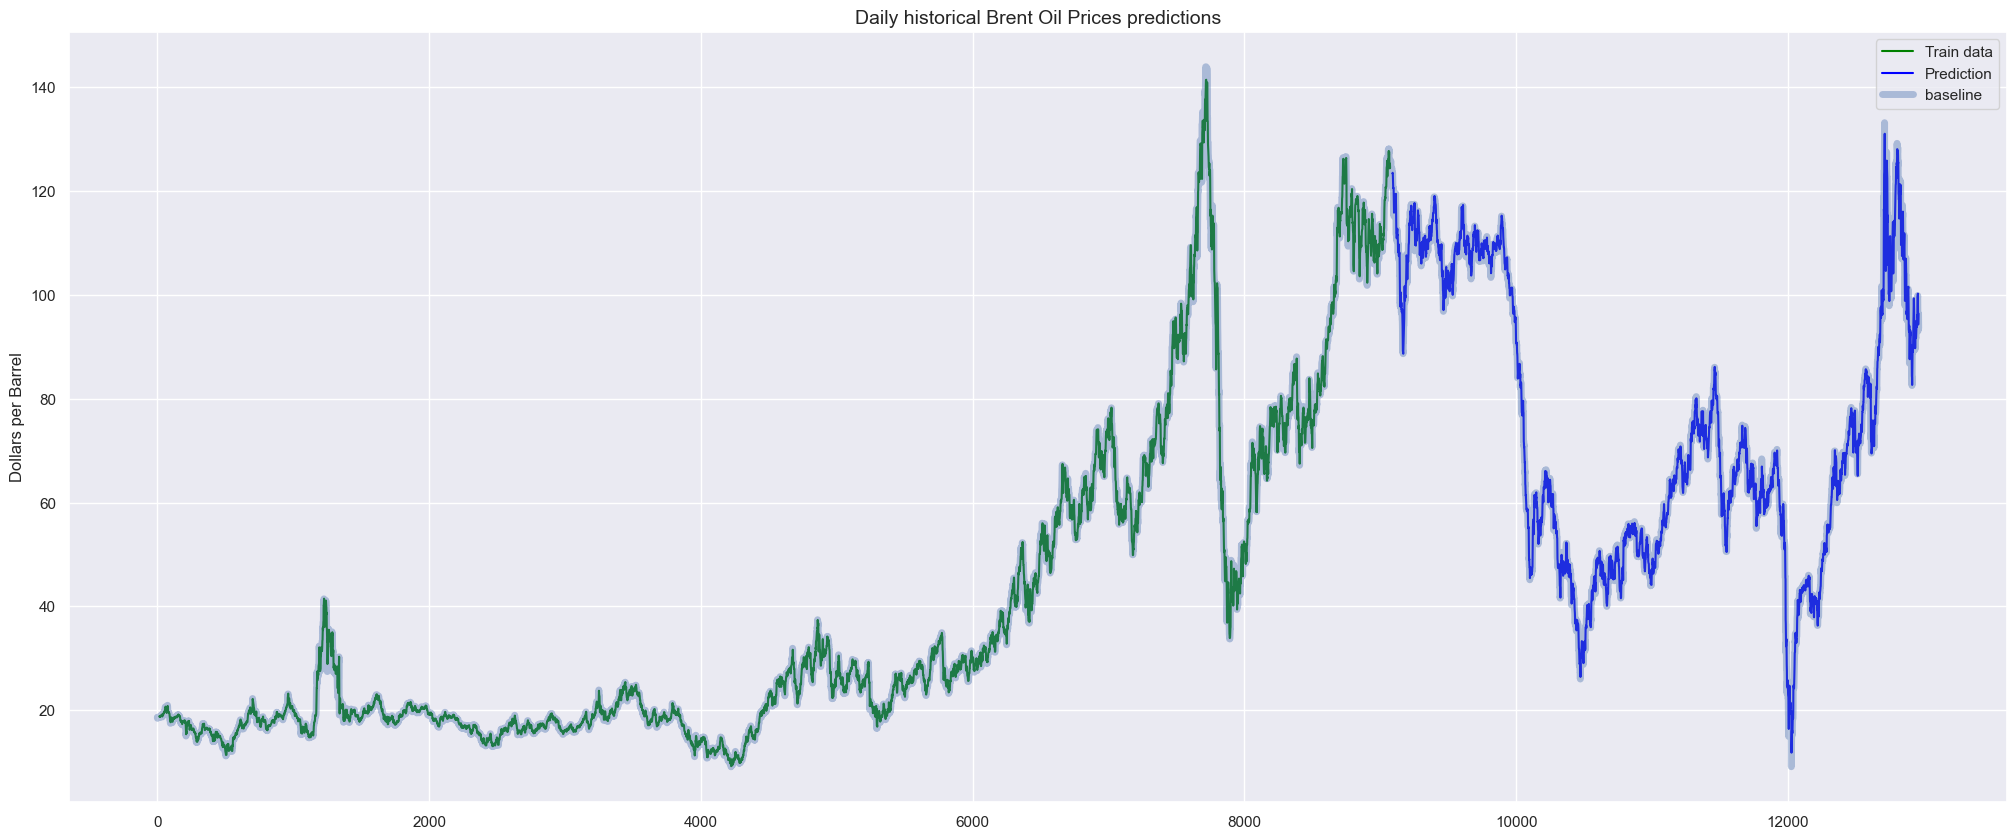

In [21]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[loop_dim:len(train_predict)+loop_dim, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(loop_dim*2)+1:len(dataset)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(25,10))
plt.plot(trainPredictPlot, color='green', label='Train data')
plt.plot(testPredictPlot, color='blue', label='Prediction',)
plt.plot(ms_scaler.inverse_transform(dataset),label='baseline', alpha=0.4, linewidth=5)
plt.title('Daily historical Brent Oil Prices predictions', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.legend()
plt.show()

# Random Forest

In [41]:
regressor = RandomForestRegressor(n_estimators=50,
                                  random_state=0)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [42]:
pred = regressor.predict(X_test)

In [43]:
print(pred)

[0.85367149 0.85116055 0.85115017 ... 0.62997849 0.63450797 0.63719095]


In [44]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_test, pred))
print('RF-Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, pred))
print('RF-Test Score: %.2f RMSE' % (testScore))

RF-Train Score: 0.01 RMSE
RF-Test Score: 0.01 RMSE


In [45]:
print('RF-R2 Score: ', r2_score(y_test, pred))

RF-R2 Score:  0.9970241599685814


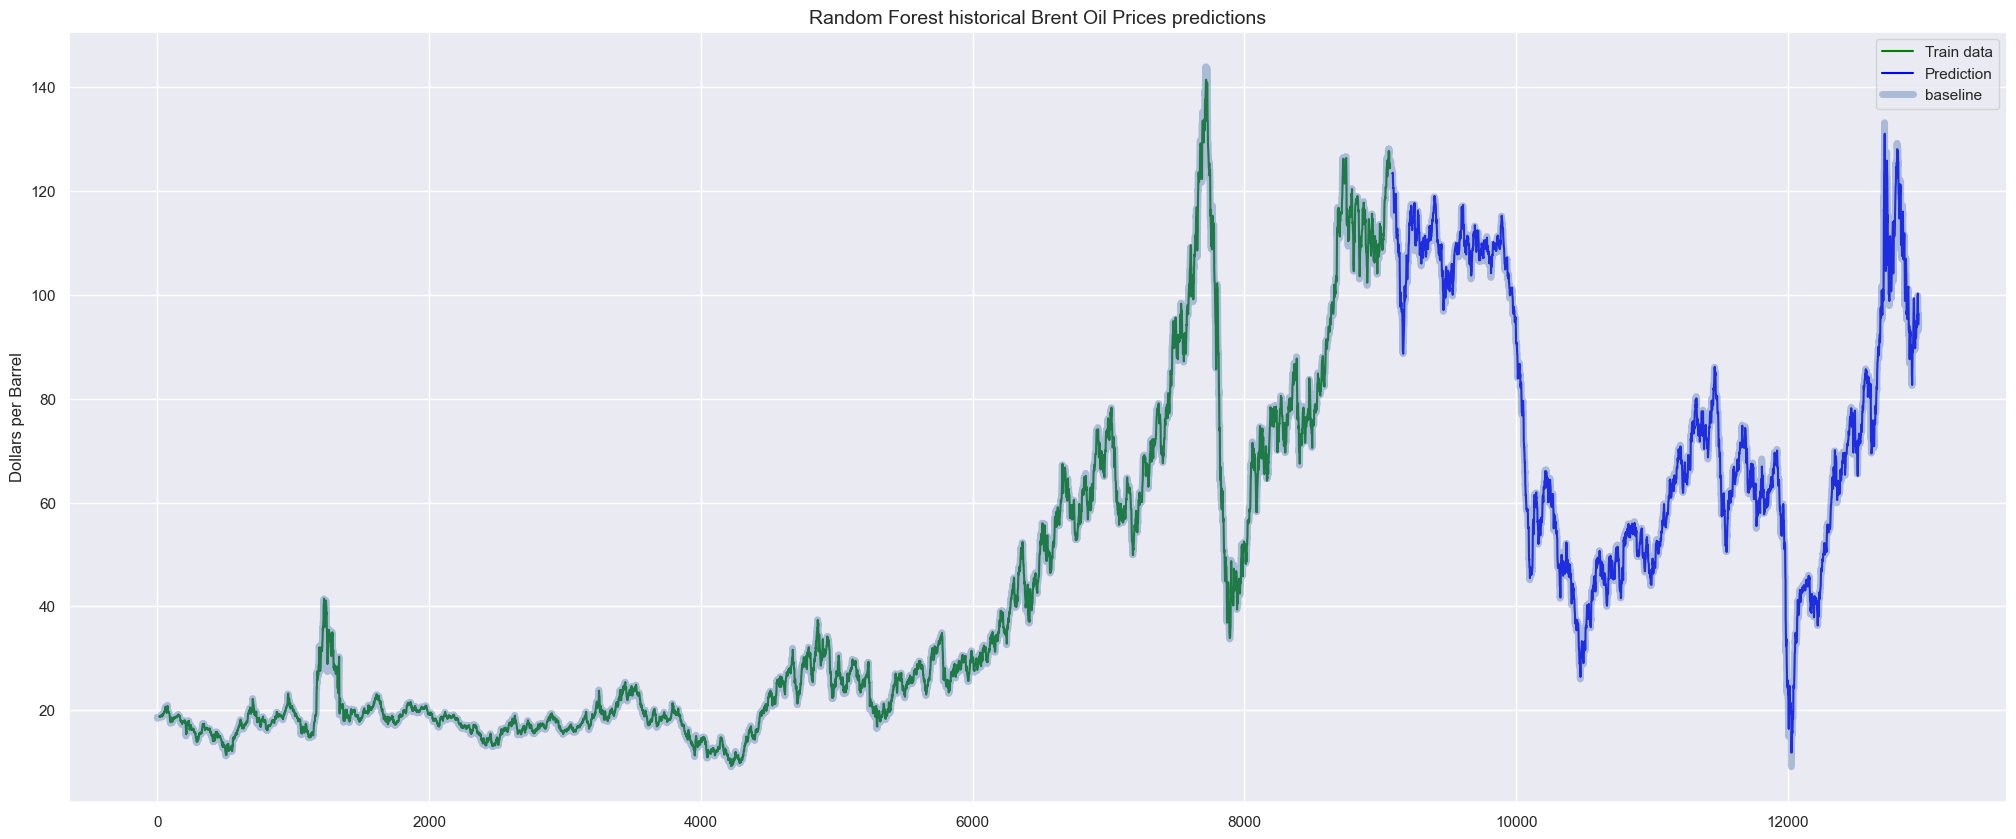

In [46]:
# train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[loop_dim:len(train_predict)+loop_dim, :] = train_predict

# test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(loop_dim*2)+1:len(dataset)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(25,10))
plt.plot(trainPredictPlot, color='green', label='Train data')
plt.plot(testPredictPlot, color='blue', label='Prediction',)
plt.plot(ms_scaler.inverse_transform(dataset),label='baseline', alpha=0.4, linewidth=5)
plt.title('Random Forest historical Brent Oil Prices predictions', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.legend()
plt.show()

# LINEAR REGRESSION

In [47]:
lin_regressor = LinearRegression(fit_intercept=False)
# fit the regressor with x and y data
lin_regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [48]:
lin_pred = lin_regressor.predict(X_test)

In [49]:
# calculate root mean squared error
lin_train_score = math.sqrt(mean_squared_error(y_test, lin_pred))
print('LR-Train Score: %.2f RMSE' % (lin_train_score))
lin_test_score = math.sqrt(mean_squared_error(y_test, lin_pred))
print('LR-Test Score: %.2f RMSE' % (lin_test_score))

LR-Train Score: 0.01 RMSE
LR-Test Score: 0.01 RMSE


In [50]:
print('LR-R2 Score: ', r2_score(y_test, pred))

LR-R2 Score:  0.9970241599685814


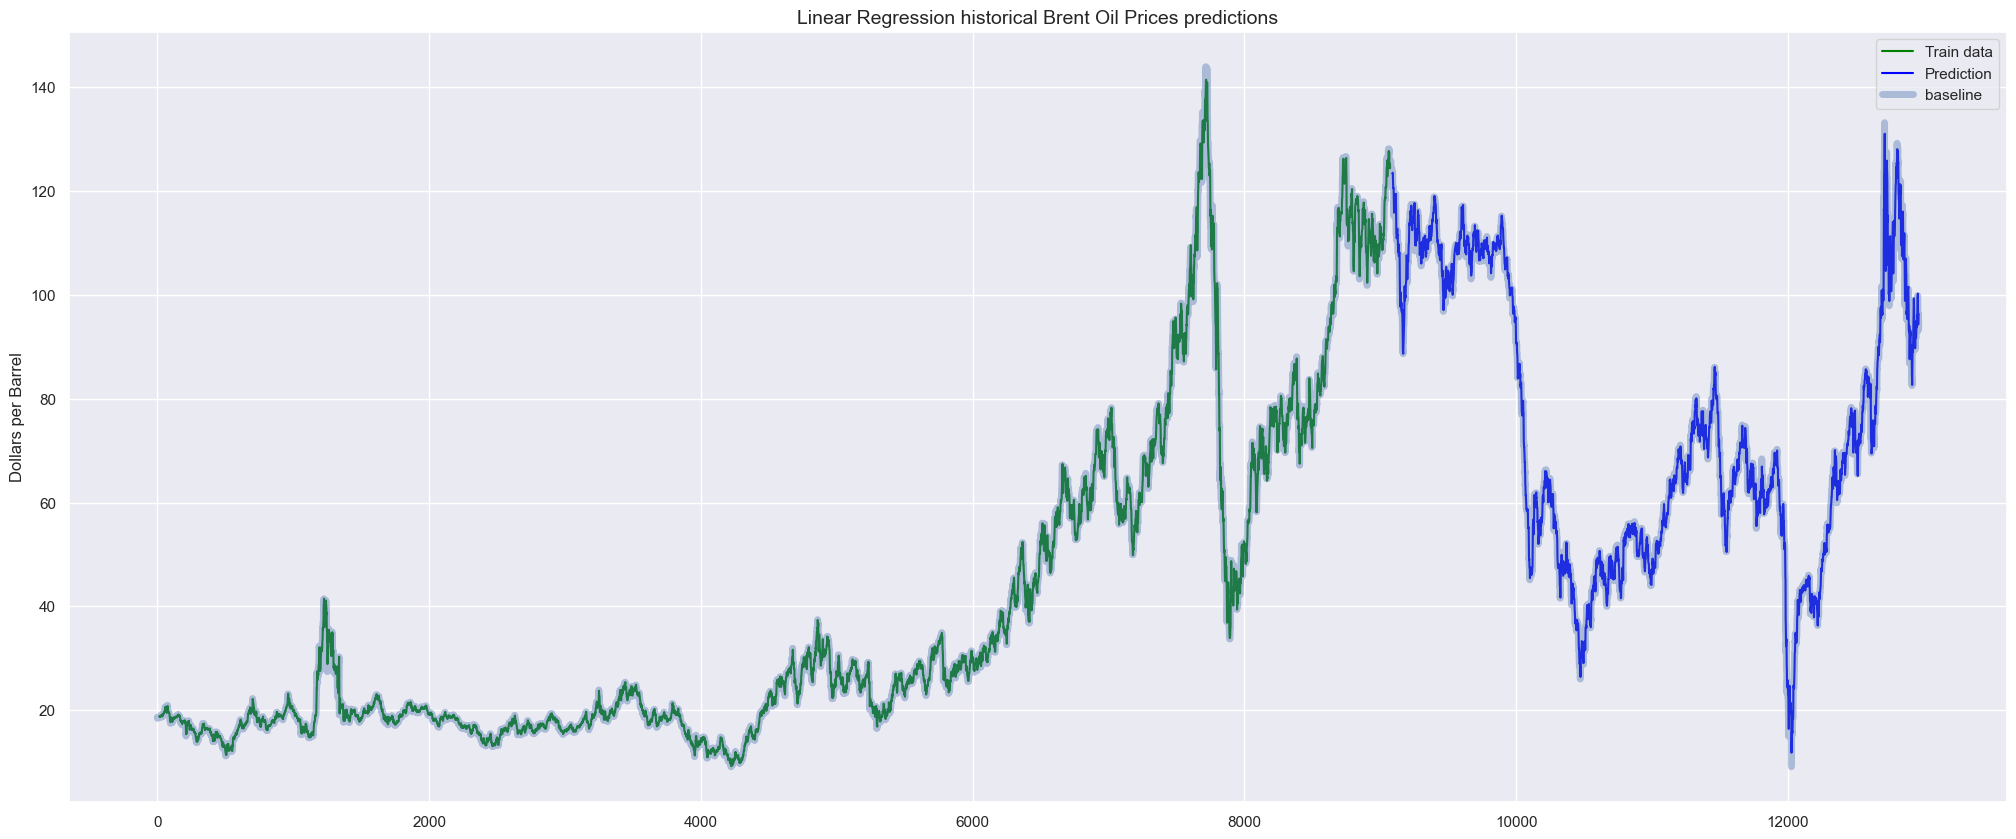

In [51]:
# train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[loop_dim:len(train_predict)+loop_dim, :] = train_predict

# test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(loop_dim*2)+1:len(dataset)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(25,10))
plt.plot(trainPredictPlot, color='green', label='Train data')
plt.plot(testPredictPlot, color='blue', label='Prediction',)
plt.plot(ms_scaler.inverse_transform(dataset),label='baseline', alpha=0.4, linewidth=5)
plt.title('Linear Regression historical Brent Oil Prices predictions', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.legend()
plt.show()